In [157]:
import numpy as np
import shapely
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import itertools 

In [158]:
# def give_trapezoid(str, locs):
#     length = 150_000
#     lengths = np.diff(np.concat([locs, [length + 1]]))
#     locs = np.concat([locs, [length + 1]])
#     r = 200 
#     l0 = 2_000
#     l1 = 10_000
#     # convert to form 
#     interfaces = []
#     conv = {"A": 0, "B":1, "C":2, "D":3, "E":4, "F": 5}

#     island_str = str.split("|")
#     print(island_str)
#     islands = []
#     island_sums = []
#     island_locs = []
#     for i in range(len(island_str)):
#         if i != len(island_str) - 1:
#             interfaces.append(f"{island_str[i][-1]}|{island_str[i + 1][0]}")
#         island = [conv[s] for s in island_str[i]]

#         jlen = sum([lengths[j] for j in island])
#         island_sums.append(jlen)
#         island_locs.append((locs[island[0]], locs[island[-1] + 1] - 1))

#         islands.append([conv[s] for s in island_str[i]])

#     # give lengths 
#     print(island_locs)
#     print(island_sums)


#     # get islands that are close enough together
#     island_pairs = []
#     for i in range(len(island_sums)):
#         if i == len(island_sums) - 1:
#             break 
        
#         length_away = 0
#         j = 1
#         while length_away < 10_000 and i + j < len(island_sums):
#             island_pairs.append((i, i + j, length_away))
#             length_away += island_sums[i + j]
#             # print(f"{(i, i + j)}, length_away = {length_away}")

#             j += 1
#     print(island_pairs)

#     traps = []
#     for pair in island_pairs:
#         a1, b1 = island_locs[pair[0]]
#         S1 = island_sums[pair[0]]
#         a2, b2 = island_locs[pair[1]]
#         d = pair[2]
#         S2 = island_sums[pair[1]]

#         # for the case where "other part" is so small it limits form of closest
#         x = b1 - r - max(0, l0 - (d + S2))
#         x_used = (b1 - x) - r
#         yx_l = a2 + max(0, l0 - max(0, d + x_used - l0))
#         yx_r = min(b2 - r, a2 + l1 - d)

#         y = a2 + max(0, l0 - (d + S1))
#         y_used = (y - a2)
#         xy_r = min(b1 - r, b1 - r - l0 + max(0, d + y_used - l0))
#         xy_l = max(a1, b1 - r - l1 + d)

#         print(x, yx_l, yx_r, y, xy_r, xy_l)

#         trap = [(xy_l, y), (xy_r, y), (x, yx_l), (x, yx_r)]

#         traps.append(trap)

#     return islands, interfaces, traps

# locs = np.asarray([1, 20_001, 25_001, 50_001, 100_001])
# locs2 = np.asarray([1, 20_001, 25_001, 97_001, 100_001])
# locs3 = np.asarray([1, 20_001, 40_001, 60_001, 80_001])
# island1, interfaces1, traps1 = give_trapezoid("AB|D|B|DE", locs) 
# island2, interfaces2, traps2 = give_trapezoid("AB|DE", locs)
# island3, interfaces3, traps3 = give_trapezoid("ABCD|BCDE", locs) 

In [159]:
parents = {"II": "ABCD|BCD|BCDE", 
           "ID": "ABCD|BCD|BCDE",
           "DD": "AB|DE", 
           "DI": "AB|DE"}

In [ ]:
cases = {"DI": [],
		 "II": [],
		 "ID": [],
		 "DD": []}
csv_path = "/Users/rfeld/Documents/Research/SPATIAL/pipeline/traps/patterns.csv" 
with open(csv_path, "r") as f:
    for l in f.readlines():
        entries = l.strip().split(",")
        p, l, ll, b, bl = entries[:5]
        cases[p].append(((l, ll), (b, bl))) 

KeyError: 'II0IF'

In [ ]:
specs_file = "/Users/rfeld/Documents/Research/SPATIAL/pipeline/traps/specs.csv"
def log_entry(parent, arch, ep, label, seq, plot_loc, islands):
    num_islands = len(islands["left"])
    keys = [key for key in list(islands.keys()) if key != "hatch"]
    rows = [[parent, label, arch, str(ep), seq, plot_loc] + [str(islands[key][i]) for key in keys] for i in range(num_islands)]


    with open(specs_file, "a+") as f:
        for row in rows:
            f.write(",".join(row) + "\n")


In [ ]:
# length = 150_000
# r = 200 
# l0 = 2_000
# l1 = 10_000
# def give_trapezoid(str, locs):
# 	lengths = np.diff(np.concat([locs, [length + 1]]))
# 	locs = np.concat([locs, [length + 1]])
# 	# convert to form 
# 	interfaces = []
# 	conv = {"A": 0, "B":1, "C":2, "D":3, "E":4, "F": 5, "G": 6}
# 	rconv = {0: "A", 1:"B", 2:"C", 3:"D", 4:"E", 5:"F", 6:"G"}

# 	island_str = str.split("|")
# 	islands = []
# 	island_sums = []
# 	island_locs = []
# 	for i in range(len(island_str)):
# 		if i != len(island_str) - 1:
# 			interfaces.append(f"{island_str[i][-1]}|{island_str[i + 1][0]}")
# 		island = [conv[s] for s in island_str[i]]

# 		jlen = sum([lengths[j-1] for j in island])
# 		island_sums.append(jlen)
# 		island_locs.append((locs[island[0]], locs[island[-1] + 1] - 1))

# 		islands.append([conv[s] for s in island_str[i]])

# 	_islands = {}
# 	# get islands that are close enough together
# 	island_pairs = []
# 	right_grouping = []
# 	left_grouping = []
# 	for i in range(len(island_sums)):
# 		if i == len(island_sums) - 1:
# 			break 
# 		length_away = 0
# 		j = 1
# 		while length_away < 10_000 and i + j < len(island_sums):
# 			island_pairs.append((i, i + j, length_away))
# 			length_away += island_sums[i + j]
# 			# print(f"{(i, i + j)}, length_away = {length_away}")
# 			right_grouping.append(i + j)
# 			left_grouping.append(i)

# 			j += 1

# 	traps = []
# 	l0s = []
# 	l1s = []
# 	looks_like = []
# 	a1s = []
# 	a2s = []
# 	b1s = []
# 	b2s = []
# 	ds = [] 
# 	for pair in island_pairs:
# 		a1, b1 = island_locs[pair[0]]
# 		S1 = island_sums[pair[0]]
# 		a2, b2 = island_locs[pair[1]]
# 		d = pair[2]
# 		S2 = island_sums[pair[1]]

# 		a1s.append(a1) 
# 		b1s.append(b1)
# 		a2s.append(a2)
# 		b2s.append(b2)
# 		ds.append(d)


# 		# insertion-deletion scheme
# 		if a2 > b1:
# 			looks_like.append(0)
# 		else:
# 			looks_like.append(1)

# 		# limited range of insert sizes for cases
# 		l0s.append(max(d, l0))
# 		l1s.append(min(l1, S2 + d - r))
		

# 		# for the case where "other part" is so small it limits form of closest
# 		x = b1 - r - max(0, l0 - (d + S2))
# 		x_used = (b1 - x) - r
# 		yx_l = a2 + max(0, l0 - max(0, d + x_used - l0))
# 		yx_r = min(b2 - r, a2 + l1 - d)

# 		y = a2 + max(0, l0 - (d + S1))
# 		y_used = (y - a2)
# 		xy_r = min(b1 - r, b1 - r - l0 + max(0, d + y_used - l0))
# 		xy_l = max(a1, b1 - r - l1 + d)


# 		trap = [(xy_l, y), (xy_r, y), (x, yx_l), (x, yx_r)]

# 		traps.append(trap)
	
# 	# collect pairings
# 	_islands['left'] = left_grouping 
# 	_islands['right'] = right_grouping
# 	_islands['left_str'] = [island_str[i] for i in left_grouping]
# 	_islands['right_str'] = [island_str[i] for i in right_grouping]
# 	_islands['looks_like'] = looks_like 
# 	_islands['l0'] = l0s 
# 	_islands['l1'] = l1s
# 	_islands['a1'] = a1s 
# 	_islands['b1'] = b1s
# 	_islands['a2'] = a2s 
# 	_islands['b2'] = b2s 

# 	# unique_rights = sorted(set(right_grouping))
# 	# hatch_patterns = itertools.cycle(["///", "\\\\", "xx", "++", "**", "oo", "...."])
# 	# hatch_map = {r: next(hatch_patterns) for r in unique_rights}
# 	# hatches = [hatch_map[r] for r in right_grouping]
# 	# _islands["hatch"] = hatches
# 	_islands["hatch"] = [None] * len(l0s)

# 	return _islands, interfaces, traps


# locs = np.asarray([1, 20_001, 40_001, 60_001, 80_001, 100_001, 120_001])
# locs2 = np.asarray([1, 20_001, 40_001, 45_001, 60_000, 100_001, 120_001])
# locs3 = np.asarray([1, 20_001, 40_001, 45_001, 97_001, 100_001, 120_001])


# trap_path = "/Users/rfeld/Documents/Research/SPATIAL/pipeline/traps"
# parents = {"II": "ABC", 
# 		   "ID": "ABCDE|CDE|CDEFG",
# 		   "DD": "ABC|EFG", 
# 		   "DI": "AB|FG"}
# for case in ("II", "ID", "DD", "DI"):
# 	if case[0] == "I":
# 		parent_label = "0:ins"
# 	else:
# 		parent_label = "0:del"
# 	for pair in cases[case]:
		
# 		seq = parent
# 		parent = parents[case]
# 		island_p1, interface_p1, trap_p1 = give_trapezoid(parent, locs)
# 		island_p2, interface_p2, trap_p2 = give_trapezoid(parent, locs2)
# 		island_p3, interface_p3, trap_p3 = give_trapezoid(parent, locs3)
# 		legend_elements = [mpatches.Patch(facecolor='blue', alpha=0.4, label=parent_label)]
# 		fig, ax = plt.subplots(ncols = 3, figsize = (18, 12), sharex = True)
# 		ax[0].set_xlabel("Separated")
# 		ax[1].set_xlabel("Left Endpoint")
# 		ax[2].set_xlabel("Both Endpoints")
# 		for t, h in zip(trap_p1, island_p1["hatch"]):
# 			tpatch = mpatches.Polygon(t, closed = True, facecolor = 'blue', 
# 							 alpha = 0.4, hatch = h)
# 			ax[0].add_patch(tpatch)
# 		for t, h in zip(trap_p2, island_p2["hatch"]):
# 			tpatch = mpatches.Polygon(t, closed = True, facecolor = 'blue', 
# 							 alpha = 0.4, hatch = h)
# 			ax[1].add_patch(tpatch)
# 		for t, h in zip(trap_p3, island_p3["hatch"]):
# 			tpatch = mpatches.Polygon(t, closed = True, facecolor = 'blue', 
# 							 alpha = 0.4, hatch = h)
# 			ax[2].add_patch(tpatch)
# 		titleadd = ""
# 		if pair[0] != -1:
# 			il_p1, inl_p1, tl_p1 = give_trapezoid(pair[0][0], locs)
# 			il_p2, inl_p2, tl_p2 = give_trapezoid(pair[0][0], locs2)
# 			il_p3, inl_p3, tl_p3 = give_trapezoid(pair[0][0], locs3)
# 			labell = f"l:{pair[0][1]}"
# 			titlel = f"{pair[0][1]}_"
# 			for t in tl_p1:
# 				tpatch = mpatches.Polygon(t, closed = True,
# 							  facecolor = 'red', alpha = 0.4)
# 				ax[0].add_patch(tpatch)
# 			for t in tl_p2:
# 				tpatch = mpatches.Polygon(t, closed = True,
# 							  facecolor = 'red', alpha = 0.4)
# 				ax[1].add_patch(tpatch) 
# 			for t in tl_p3:
# 				tpatch = mpatches.Polygon(t, closed = True,
# 							  facecolor = 'red', alpha = 0.4)
# 				ax[2].add_patch(tpatch) 
# 			seq += f" - (L) - {pair[0][0]}"
# 			legend_elements.append(mpatches.Patch(facecolor = 'red',
# 										  alpha = 0.4,
# 										  label = labell))

# 		else:
# 			titlel = ""
# 			labell = ""
# 			titleadd = " (No Pair-Linear)"
			
# 		if pair[1] != -1:
# 			ib_p1, inb_p1, tb_p1 = give_trapezoid(pair[1][0], locs)
# 			ib_p2, inb_p2, tb_p2 = give_trapezoid(pair[1][0], locs2)
# 			ib_p3, inb_p3, tb_p3 = give_trapezoid(pair[1][0], locs3)
# 			labelb = f"b:{pair[1][1]}"
# 			titleb = f"{pair[1][1]}"
# 			for t, h in zip(tb_p1, ib_p1['hatch']):
# 				tpatch = mpatches.Polygon(t, closed = True,
# 							  facecolor = 'green', alpha = 0.4, hatch = h)
# 				ax[0].add_patch(tpatch)
# 			for t, h in zip(tb_p2, ib_p2['hatch']):
# 				tpatch = mpatches.Polygon(t, closed = True,
# 							  facecolor = 'green', alpha = 0.4, hatch = h)
# 				ax[1].add_patch(tpatch) 
# 			for t, h in zip(tb_p3, ib_p3['hatch']):
# 				tpatch = mpatches.Polygon(t, closed = True,
# 							  facecolor = 'green', alpha = 0.4, hatch = h)
# 				ax[2].add_patch(tpatch) 
# 			seq += f" - (B) - {pair[1][0]}"
# 			legend_elements.append(mpatches.Patch(facecolor = 'green',
# 										  alpha = 0.4,
# 										  label = labelb))
# 		else:
# 			titleb = ""
# 			labelb = ""
# 			titleadd = " (No Pair-Branching)"
		
# 		plot_loc = f"{case}_{titlel}{titleb}.png"
# 		log_entry(case, "P", 1, parent_label, parent, plot_loc, island_p1)
# 		log_entry(case, "P", 2, parent_label, parent, plot_loc, island_p2)
# 		log_entry(case, "P", 3, parent_label, parent, plot_loc, island_p3)
# 		if titleb != "":	
# 			log_entry(case, "B", 1, labelb, pair[1][0], plot_loc, ib_p1)
# 			log_entry(case, "B", 2, labelb, pair[1][0], plot_loc, ib_p2)
# 			log_entry(case, "B", 3, labelb, pair[1][0], plot_loc, ib_p3)
# 		if titlel != "":
# 			log_entry(case, "L", 1, labelb, pair[0][0], plot_loc, il_p1)
# 			log_entry(case, "L", 2, labelb, pair[0][0], plot_loc, il_p2)
# 			log_entry(case, "L", 3, labelb, pair[0][0], plot_loc, il_p3)			

# 		ax[1].set_title(seq)
# 		ax[0].set_ylabel(f"{case}: {titlel}{titleb}{titleadd}")
# 		ax[2].legend(handles=legend_elements, loc='upper right', fontsize='small')
# 		for i, a in enumerate(ax):
# 			a.set_xlim(0, length - l1 - r)
# 			a.set_ylim(0, length - l1 - r)
# 			a.set_aspect('equal', adjustable='box')
# 			a.grid(True)
# 			if i != 0:
# 				a.set_yticklabels([])
# 				region_labels = ["A", "B", "C", "D", "E", "F", "G"]  # Trim if needed
# 			region_ends = np.append(locs[1:], length)
# 		all_locs = [locs, locs2, locs3]
# 		for axis, loc in zip(ax, all_locs):
# 			# for i in range(len(loc)):
# 			# 	mid = (loc[i] + region_ends[i]) / 2
# 			# 	axis.text(mid, length * 0.01 + 1,  # Slightly below bottom
# 			# 			region_labels[i],
# 			# 			ha='center', va='top',
# 			# 			fontsize='small', fontweight='bold')
# 			baseline_y = 5_000
# 			region_ends = np.append(loc[1:], length)
# 			for j in range(len(loc)):
# 				# Draw horizontal line from start to end of region
# 				start = loc[j]
# 				end = region_ends[j]
# 				axis.plot([start, end], [baseline_y, baseline_y], color='black', linewidth=1)

# 				# Add vertical tick at start (skip for j=0 if you prefer no initial tick)
# 				axis.scatter([start, start], [baseline_y - 200, baseline_y + 200], color='black', s=20)

# 				# Add region label at midpoint
# 				mid = (start + end) / 2
# 				axis.text(mid, baseline_y - 400, region_labels[j],
# 					ha='center', va='top', fontsize='x-small', fontweight='bold')
# 		fig.tight_layout()
# 		fig.savefig(f"{trap_path}/{case}_{titlel}{titleb}.png")

In [ ]:
A-B-C-D-E 

E-B|D-E

B|D 
E|D

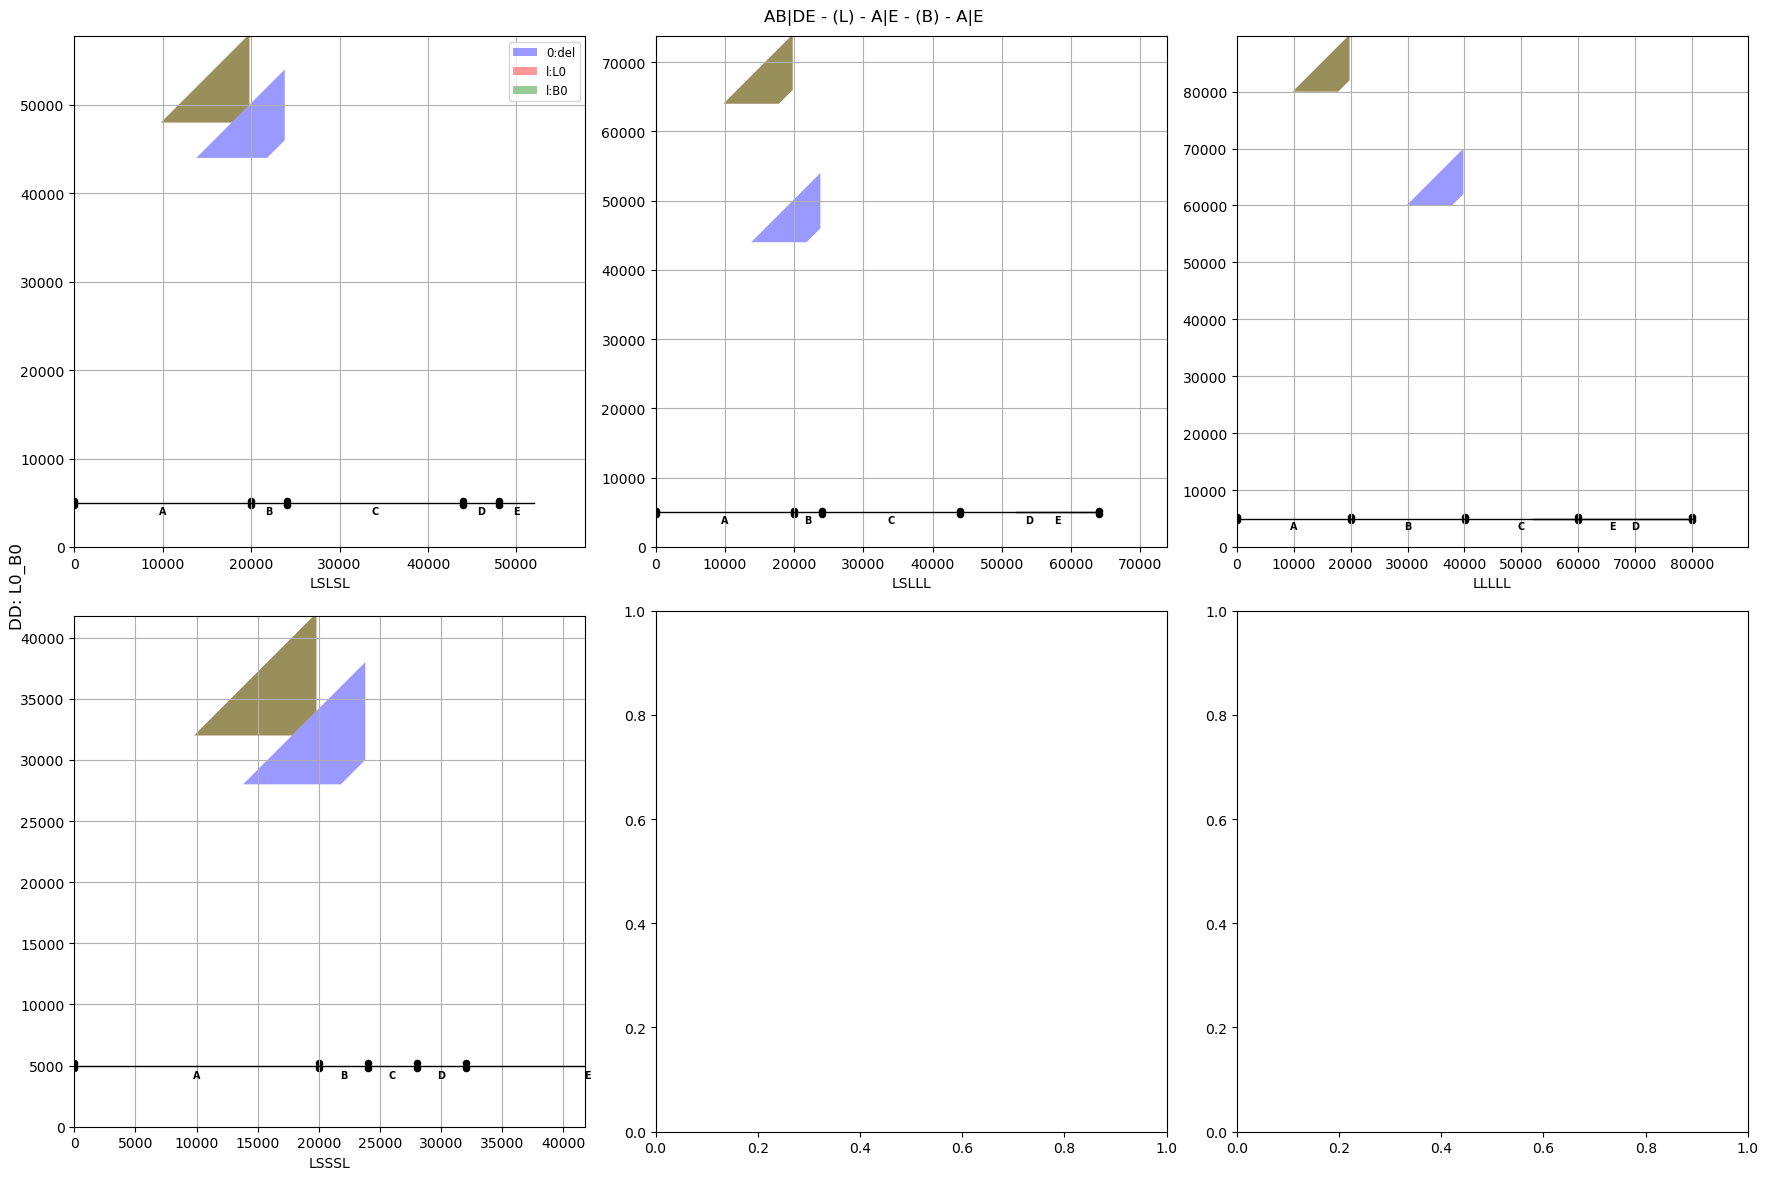

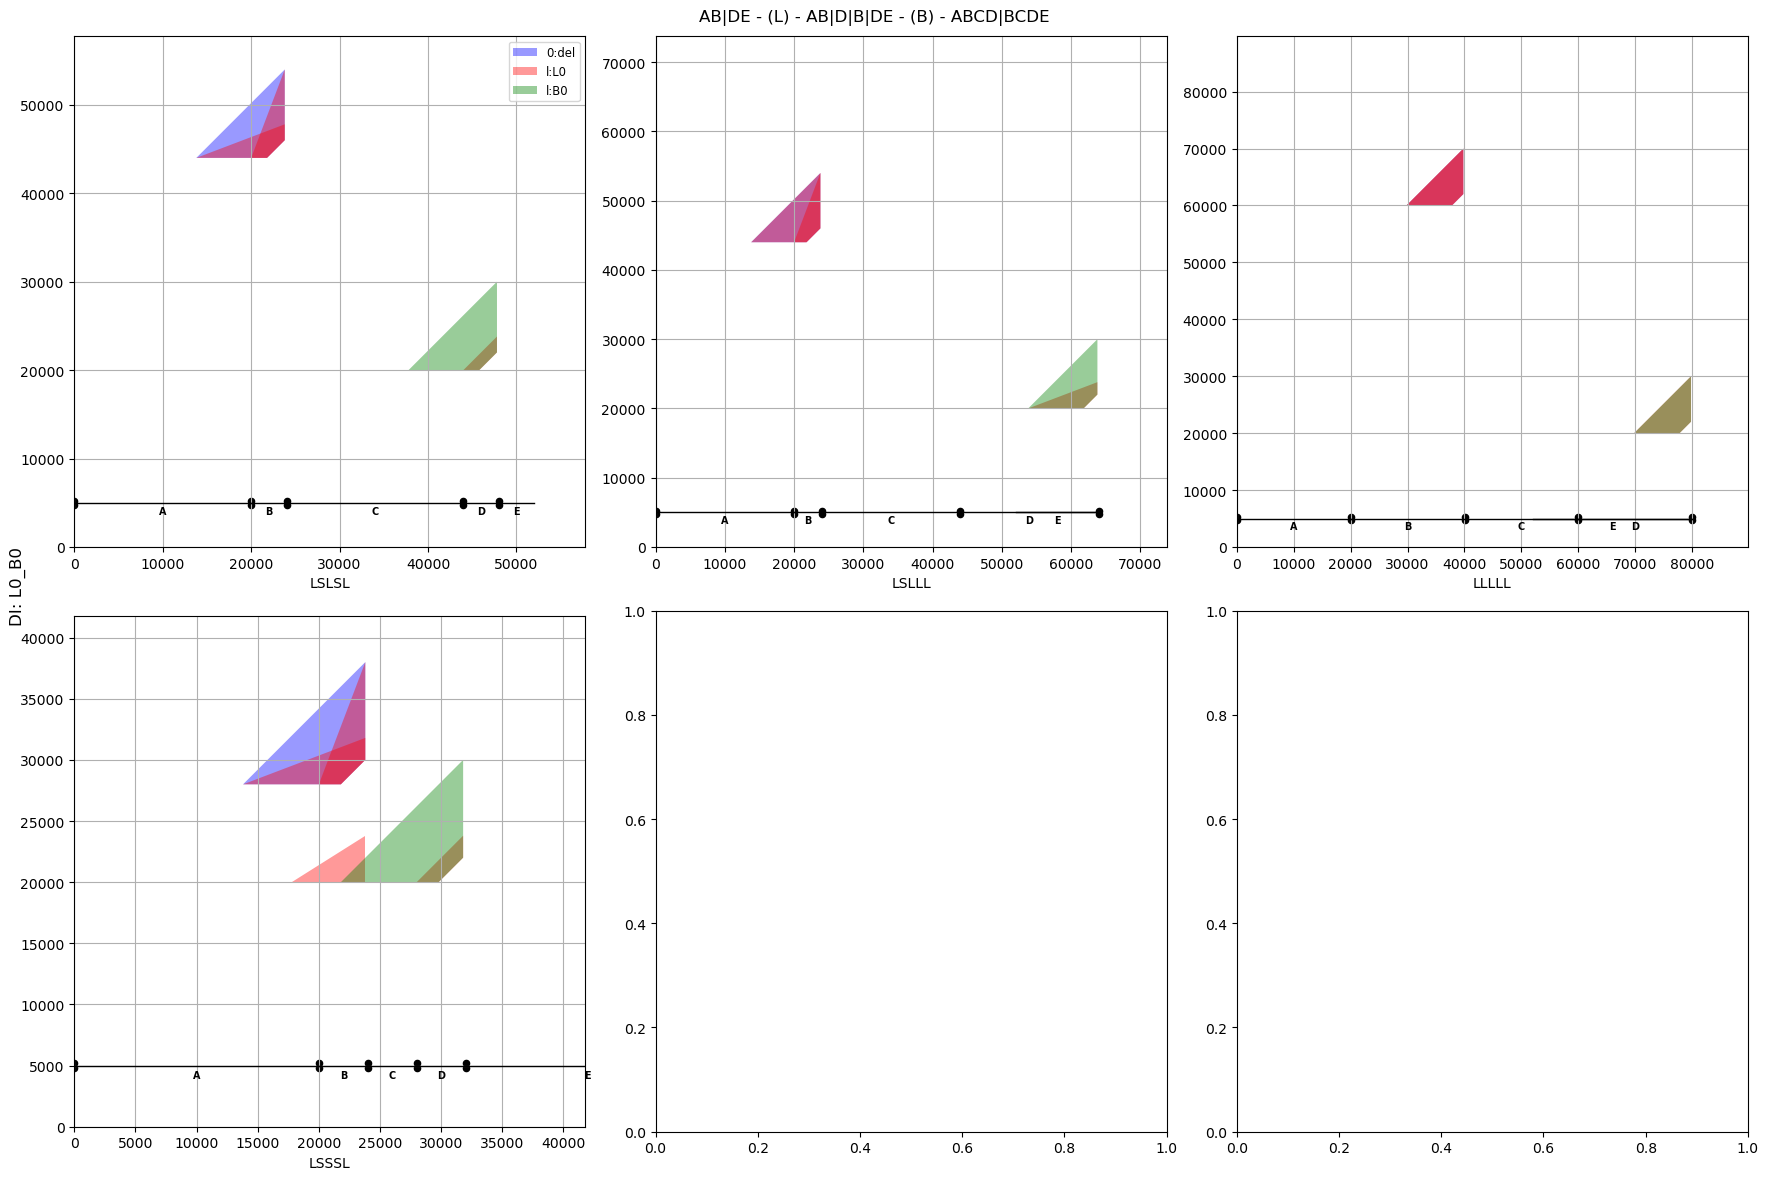

In [ ]:
length = 150_000
r = 200 
l0 = 2_000
l1 = 10_000
def give_trapezoid(str, locs, length):
	lengths = np.diff(np.concat([locs, [length + 1]]))
	locs = np.concat([locs, [length + 1]])
	# convert to form 
	interfaces = []
	conv = {"A": 0, "B":1, "C":2, "D":3, "E":4, "F": 5, "G": 6}
	rconv = {0: "A", 1:"B", 2:"C", 3:"D", 4:"E", 5:"F", 6:"G"}

	island_str = str.split("|")
	islands = []
	island_sums = []
	island_locs = []
	for i in range(len(island_str)):
		if i != len(island_str) - 1:
			interfaces.append(f"{island_str[i][-1]}|{island_str[i + 1][0]}")
		island = [conv[s] for s in island_str[i]]

		jlen = sum([lengths[j-1] for j in island])
		island_sums.append(jlen)
		island_locs.append((locs[island[0]], locs[island[-1] + 1] - 1))

		islands.append([conv[s] for s in island_str[i]])

	_islands = {}
	# get islands that are close enough together
	island_pairs = []
	right_grouping = []
	left_grouping = []
	for i in range(len(island_sums)):
		if i == len(island_sums) - 1:
			break 
		length_away = 0
		j = 1
		while length_away < 10_000 and i + j < len(island_sums):
			island_pairs.append((i, i + j, length_away))
			length_away += island_sums[i + j]
			# print(f"{(i, i + j)}, length_away = {length_away}")
			right_grouping.append(i + j)
			left_grouping.append(i)

			j += 1

	traps = []
	l0s = []
	l1s = []
	looks_like = []
	a1s = []
	a2s = []
	b1s = []
	b2s = []
	ds = [] 
	for pair in island_pairs:
		a1, b1 = island_locs[pair[0]]
		S1 = island_sums[pair[0]]
		a2, b2 = island_locs[pair[1]]
		d = pair[2]
		S2 = island_sums[pair[1]]

		a1s.append(a1) 
		b1s.append(b1)
		a2s.append(a2)
		b2s.append(b2)
		ds.append(d)


		# insertion-deletion scheme
		if a2 > b1:
			looks_like.append(0)
		else:
			looks_like.append(1)

		# limited range of insert sizes for cases
		l0s.append(max(d, l0))
		l1s.append(min(l1, S2 + d - r))
		

		# for the case where "other part" is so small it limits form of closest
		x = b1 - r - max(0, l0 - (d + S2))
		x_used = (b1 - x) - r
		yx_l = a2 + max(0, l0 - max(0, d + x_used - l0))
		yx_r = min(b2 - r, a2 + l1 - d)

		y = a2 + max(0, l0 - (d + S1))
		y_used = (y - a2)
		xy_r = min(b1 - r, b1 - r - l0 + max(0, d + y_used - l0))
		xy_l = max(a1, b1 - r - l1 + d)


		trap = [(xy_l, y), (xy_r, y), (x, yx_l), (x, yx_r)]

		traps.append(trap)
	
	# collect pairings
	_islands['left'] = left_grouping 
	_islands['right'] = right_grouping
	_islands['left_str'] = [island_str[i] for i in left_grouping]
	_islands['right_str'] = [island_str[i] for i in right_grouping]
	_islands['looks_like'] = looks_like 
	_islands['l0'] = l0s 
	_islands['l1'] = l1s
	_islands['a1'] = a1s 
	_islands['b1'] = b1s
	_islands['a2'] = a2s 
	_islands['b2'] = b2s 

	# unique_rights = sorted(set(right_grouping))
	# hatch_patterns = itertools.cycle(["///", "\\\\", "xx", "++", "**", "oo", "...."])
	# hatch_map = {r: next(hatch_patterns) for r in unique_rights}
	# hatches = [hatch_map[r] for r in right_grouping]
	# _islands["hatch"] = hatches
	_islands["hatch"] = [None] * len(l0s)

	return _islands, interfaces, traps

# locs = np.asarray([1, 20_001, 40_001, 60_001, 80_001, 100_001, 120_001])
# locs2 = np.asarray([1, 20_001, 40_001, 45_001, 60_000, 100_001, 120_001])
# locs3 = np.asarray([1, 20_001, 40_001, 45_001, 97_001, 100_001, 120_001])

map_length_patterns = {"S": 4000, "M": 6000, "L":20000}

trap_path = "/Users/rfeld/Documents/Research/SPATIAL/pipeline/traps"
parents = {"II0IF": ("ABCD|BCD|BCDE", []), 
		   "II0IU": ("ABCD|BCD|BCDE", []),
		   "ID": ("ABCDE|CDE|CDEFG", []),
		   "DD": ("AB|DE", ["SLS", "SLL", "LLL", "SSS"]), 
		   "DI": ("AB|DE", ["SLS", "SLL", "LLL", "SSS"])}
for case in parents:
	if case[0] == "I":
		parent_label = "0:ins"
	else:
		parent_label = "0:del"
	loc_labels = []
	all_locs = []
	for pair in cases[case]:
		# DEFINE ALL LOC PATTERNS
		p = parents[case][0]
		seq = p
		lengths = []
		all_locs = []
		loc_labels = []
		for loc_pattern in parents[case][1]:
			lp = "L" + loc_pattern + "L"
			sizes = np.asarray([0] + [map_length_patterns[s] for s in lp])
			length = sizes.sum()
			edges = (np.cumsum(sizes) + 1)[:-1]
			loc_labels.append(lp)
			all_locs.append(edges)
			lengths.append(length)
		nlocs = len(all_locs)
		nrows = int(np.ceil(nlocs / 3))

		fig, ax = plt.subplots(ncols = 3, nrows = nrows, figsize = (18, 6 * nrows), squeeze = False)
		if isinstance(ax, np.ndarray):
			ax = ax.flatten()
		else:
			ax = [ax]
		legend_elements = [mpatches.Patch(facecolor='blue', alpha=0.4, label=parent_label)]
		parent_islands = []
		parent_traps = []
		l_islands = []
		b_islands = []
		titleadd = ""
		for i, loc in enumerate(all_locs):
			pi, ip, tp = give_trapezoid(p, loc, lengths[i])
			parent_islands.append(pi)
			parent_traps.append(tp)

			ax[i].set_xlabel(loc_labels[i])

			for t in tp:
				tpatch = mpatches.Polygon(t, closed = True, facecolor = 'blue', alpha = 0.4)
				ax[i].add_patch(tpatch)

			if pair[0] != -1:
				lis, li, lt = give_trapezoid(pair[0][1], loc, lengths[i])
				labell = f"l:{pair[0][0]}"
				titlel = f"{pair[0][0]}_"
				l_islands.append(lis)

				for t in lt:
					tpatch = mpatches.Polygon(t, closed = True, facecolor = 'red', alpha = 0.4)
					ax[i].add_patch(tpatch)
			if pair[1] != -1:
				bis, bi, bt = give_trapezoid(pair[1][1], loc, lengths[i])
				labelb = f"l:{pair[1][0]}"
				titleb = f"{pair[1][0]}"
				b_islands.append(bis)


				for t in bt:
					tpatch = mpatches.Polygon(t, closed = True, facecolor = 'green', alpha = 0.4)
					ax[i].add_patch(tpatch)

		if pair[0] != -1:
			seq += f" - (L) - {pair[0][1]}"
			legend_elements.append(mpatches.Patch(facecolor = 'red',
										  alpha = 0.4,
										  label = labell))
		else:
			titlel = ""
			labell = ""
			titleadd = " (No Pair-Linear)"
			
		if pair[1] != -1:
			seq += f" - (B) - {pair[1][1]}"
			legend_elements.append(mpatches.Patch(facecolor = 'green',
										  alpha = 0.4,
										  label = labelb))
		else:
			titleb = ""
			labelb = ""
			titleadd = " (No Pair-Branching)"
		
		plot_loc = f"{case}_{titlel}{labelb}.png"

		for i, loc in enumerate(all_locs):
			log_entry(case, "P", loc_labels[i], case, p, plot_loc, parent_islands[i])
			if titleb != "":
				log_entry(case, "B", loc_labels[i], pair[1][1], pair[1][0], plot_loc, b_islands[i])
			if titlel != "":
				log_entry(case, "L", loc_labels[i], pair[0][1], pair[0][0], plot_loc, l_islands[i])			

		fig.suptitle(seq)
		fig.supylabel(f"{case}: {titlel}{titleb}{titleadd}")
		ax[0].legend(handles=legend_elements, loc='upper right', fontsize='small')

		for i in range(nlocs):
			ax[i].set_xlim(0, lengths[i] - l1 - r)
			ax[i].set_ylim(0, lengths[i] - l1 - r)
			ax[i].set_aspect('equal', adjustable='box')
			ax[i].grid(True)
			if i != 0:
				region_labels = ["A", "B", "C", "D", "E", "F", "G"]  # Trim if needed

		for axis, loc in zip(ax, all_locs):
			# for i in range(len(loc)):
			# 	mid = (loc[i] + region_ends[i]) / 2
			# 	axis.text(mid, length * 0.01 + 1,  # Slightly below bottom
			# 			region_labels[i],
			# 			ha='center', va='top',
			# 			fontsize='small', fontweight='bold')
			baseline_y = 5_000
			region_ends = np.append(loc[1:], length)
			for j in range(len(loc)):
				# Draw horizontal line from start to end of region
				start = loc[j]
				end = region_ends[j]
				axis.plot([start, end], [baseline_y, baseline_y], color='black', linewidth=1)

				# Add vertical tick at start (skip for j=0 if you prefer no initial tick)
				axis.scatter([start, start], [baseline_y - 200, baseline_y + 200], color='black', s=20)

				# Add region label at midpoint
				mid = (start + end) / 2
				axis.text(mid, baseline_y - 400, region_labels[j],
					ha='center', va='top', fontsize='x-small', fontweight='bold')
		fig.tight_layout()
		fig.savefig(f"{trap_path}/{case}_{titlel}{titleb}.png")